In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Name of the dataset, which will be read by pandas
DATASET_NAME = 'loan.csv'
df = pd.read_csv(DATASET_NAME)

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [13]:
max(df.annual_inc)

6000000.0

In [9]:
min(df.annual_inc)

4000.0

In [64]:
df['term'] = df['term'].apply(lambda x: x.strip().split(' ')[0])
df['term'] = df['term'].astype(int)

In [65]:
df['int_rate'] = df['int_rate'].apply(lambda x: x.strip().split('%')[0])
df['int_rate'] = df['term'].astype(float)

In [66]:
def transform_emp_duration(duration):
    if (pd.isnull(duration)):
        return np.nan
    duration = duration.strip()
    if duration == '< 1 year':
        return 0
    if duration == '10+ years':
        return 10
    return int(duration.split()[0])

In [67]:
df['emp_length'] = df['emp_length'].apply(lambda x: transform_emp_duration(x))
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').astype(pd.Int64Dtype())

In [68]:
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

In [69]:
df.shape

(39717, 111)

In [70]:
null_data = df.isnull().sum()/39717*100

In [71]:
null_data

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [72]:
threshold=40
drop_columns = null_data[null_data > threshold].index

In [73]:
drop_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [74]:
drop_columns.size

57

In [75]:
filtered_df = df.drop(columns=drop_columns)

In [76]:
filtered_df.shape

(39717, 54)

In [77]:
other_columns_to_drop = ['delinq_amnt','acc_now_delinq','application_type','policy_code','initial_list_status','pymnt_plan','last_credit_pull_d', 'desc', 'title', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'emp_title']
filtered_df = filtered_df.drop(columns=other_columns_to_drop)

In [78]:
filtered_df.emp_title.head()

AttributeError: 'DataFrame' object has no attribute 'emp_title'

In [79]:
filtered_df.shape

(39717, 41)

In [80]:
filtered_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [81]:
def revol_util(d):
    if (pd.isnull(d)):
        return np.nan
    if type(d) == 'float':
        return d
    return float(d.split('%')[0])

In [82]:
filtered_df.revol_util = filtered_df.revol_util.apply(revol_util)

In [83]:
def write_to_file(data, path):
    with open(path, 'w') as file:
        file.write(data.to_string())

In [84]:
filtered_df.isnull().sum().sort_values(ascending=True)

id                            0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
last_pymnt_amnt               0
out_prncp                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
out_prncp_inv                 0
addr_state                    0
dti                           0
purpose                       0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
zip_code                      0
grade                         0
home_ownership                0
annual_i

In [85]:
write

NameError: name 'write' is not defined

In [86]:
filtered_df[filtered_df.loan_status == 'Charged Off'].groupby(['grade', 'sub_grade']).size()

grade  sub_grade
A      A1            30
       A2            74
       A3           103
       A4           178
       A5           217
B      B1           171
       B2           228
       B3           341
       B4           329
       B5           356
C      C1           336
       C2           321
       C3           270
       C4           212
       C5           208
D      D1           167
       D2           271
       D3           256
       D4           215
       D5           209
E      E1           198
       E2           163
       E3           119
       E4           126
       E5           109
F      F1            91
       F2            70
       F3            51
       F4            53
       F5            54
G      G1            31
       G2            28
       G3            19
       G4            13
       G5            10
dtype: int64

In [87]:
filtered_df[filtered_df.loan_status == 'Fully Paid'].groupby('grade').size()

grade
A     9443
B    10250
C     6487
D     3967
E     1948
F      657
G      198
dtype: int64

In [88]:
filtered_df.groupby('grade').size()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
dtype: int64

In [89]:
filtered_df.groupby('revol_util').size()

revol_util
0.00     977
0.01       1
0.03       1
0.04       1
0.05       1
0.10      58
0.12       1
0.16       1
0.20      63
0.30      42
0.40      41
0.46       1
0.49       1
0.50      48
0.54       1
0.60      39
0.70      45
0.75       1
0.80      43
0.83       1
0.86       1
0.90      40
1.00      49
1.10      34
1.20      34
1.30      35
1.40      31
1.50      31
1.60      21
1.70      30
1.80      40
1.88       1
1.90      30
2.00      35
2.10      32
2.20      33
2.30      39
2.40      38
2.50      28
2.60      28
2.64       1
2.70      30
2.80      32
2.90      30
3.00      26
3.10      35
3.18       1
3.20      35
3.30      43
3.40      24
3.50      32
3.60      33
3.70      33
3.80      30
3.90      24
4.00      37
4.10      29
4.20      28
4.30      33
4.40      29
4.50      37
4.60      37
4.70      28
4.80      36
4.85       1
4.90      14
5.00      38
5.10      31
5.20      32
5.30      37
5.33       1
5.34       1
5.40      34
5.50      32
5.60      42
5.70      33
5

In [90]:
filtered_df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [91]:
filtered_df.revol_util.median()

49.3

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


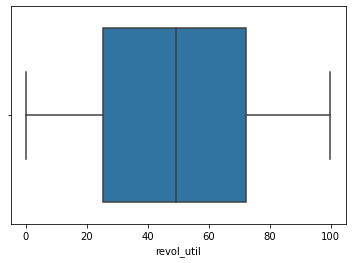

In [92]:
sns.boxplot(filtered_df.revol_util)
plt.show()

In [93]:
filtered_df.revol_util.fillna(48.8, inplace=True)

In [94]:
filtered_df.revol_util.isnull().sum()

0

In [95]:
filtered_df.last_pymnt_d.fillna('May-16', inplace=True)

In [96]:
filtered_df.last_pymnt_d.isnull().sum()

0

In [97]:
filtered_df.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

In [98]:
filtered_df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

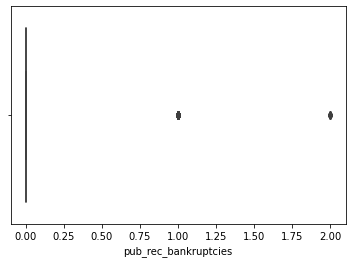

In [99]:
sns.boxplot(filtered_df.pub_rec_bankruptcies)

In [100]:
filtered_df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [101]:
filtered_df.pub_rec_bankruptcies.isnull().sum()

0

In [102]:
filtered_df.groupby('emp_length').size()

emp_length
0     4583
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
dtype: int64

In [103]:
filtered_df[filtered_df.emp_length.isnull() == True].groupby('loan_status').size()

loan_status
Charged Off    228
Current         42
Fully Paid     805
dtype: int64

In [104]:
filtered_df[filtered_df.emp_length.isnull() == True]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
168,1067644,1302032,2500,2500,2500.000000,36,36.0,77.78,A,A3,<NA>,OWN,12000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,961xx,CA,16.30,0,Aug-94,2,13,0,4853,42.20,20,0.00,0.00,1838.880000,1838.88,1575.06,253.74,0.000000,10.08,0.0000,Dec-13,77.78,0.0
323,1058717,1290516,18000,18000,18000.000000,60,60.0,452.98,D,D4,<NA>,MORTGAGE,60000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,363xx,AL,21.96,0,Mar-03,1,11,0,5945,83.70,28,0.00,0.00,26378.550010,26378.55,18000.00,8378.55,0.000000,0.00,0.0000,Sep-15,6909.59,0.0
394,1064582,1298394,4000,4000,4000.000000,36,36.0,132.31,B,B3,<NA>,RENT,24000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,328xx,FL,7.50,1,Feb-05,0,4,0,1593,54.90,6,0.00,0.00,4186.023030,4186.02,4000.00,186.02,0.000000,0.00,0.0000,May-12,3658.15,0.0
422,1064366,1298164,1000,1000,1000.000000,36,36.0,34.50,C,C3,<NA>,RENT,18408.00,Not Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,080xx,NJ,6.00,0,Apr-93,2,3,1,2510,83.70,8,0.00,0.00,91.310000,91.31,22.24,12.18,0.000000,56.89,10.2402,Jan-12,34.50,1.0
439,1063912,1296491,8250,8250,8250.000000,36,36.0,256.67,A,A3,<NA>,MORTGAGE,31500.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,218xx,MD,17.87,0,Dec-81,4,17,0,7521,10.40,37,0.00,0.00,9239.889998,9239.89,8250.00,989.89,0.000000,0.00,0.0000,Dec-14,278.92,0.0
534,1062897,1295380,1700,1700,1700.000000,36,36.0,53.20,A,A4,<NA>,MORTGAGE,37800.00,Not Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,805xx,CO,27.00,0,Jul-79,0,9,0,16333,91.20,27,0.00,0.00,1218.500000,1218.50,940.44,174.03,0.000000,104.03,1.0403,Sep-13,53.20,0.0
555,1062781,1294654,5000,5000,5000.000000,36,36.0,158.77,A,A5,<NA>,MORTGAGE,70000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,925xx,CA,16.17,1,May-83,0,9,0,8901,53.00,32,0.00,0.00,5652.840923,5652.84,5000.00,652.84,0.000000,0.00,0.0000,Feb-14,1689.20,0.0
562,1062535,1294602,3000,3000,3000.000000,36,36.0,96.68,B,B1,<NA>,MORTGAGE,42000.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,renewable_energy,551xx,MN,4.29,0,Apr-05,0,3,0,5289,33.30,3,0.00,0.00,3480.270000,3480.27,3000.00,480.27,0.000000,0.00,0.0000,Dec-14,101.19,0.0
569,1036838,1266720,8575,8575,8575.000000,36,36.0,308.21,D,D4,<NA>,MORTGAGE,32000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,325xx,FL,22.54,0,Sep-04,1,4,0,20142,89.90,5,0.00,0.00,4636.750000,4636.75,2808.63,1497.35,0.000000,330.77,3.3500,Feb-13,308.21,0.0
678,1061194,1292992,5600,5600,5600.000000,36,36.0,170.44,A,A1,<NA>,OWN,41100.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,117xx,NY,3.97,0,Jul-90,0,17,0,3777,2.70,44,0.00,0.00,5875.107097,5875.11,5600.00,275.11,0.000000,0.00,0.0000,Dec-12,3683.63,0.0


In [105]:
filtered_df.shape

(39717, 41)

In [106]:
filtered_df.emp_length.fillna(10, inplace=True)

In [107]:
filtered_df.emp_length.isnull().sum()

0

In [108]:
filtered_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,36.0,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0
1,1077430,1314167,2500,2500,2500.0,60,60.0,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0
2,1077175,1313524,2400,2400,2400.0,36,36.0,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0
3,1076863,1277178,10000,10000,10000.0,36,36.0,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0
4,1075358,1311748,3000,3000,3000.0,60,60.0,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,0.0


In [113]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  Int64  
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [115]:
filtered_df.funded_amnt.head()

0     5000
1     2500
2     2400
3    10000
4     3000
Name: funded_amnt, dtype: int64

<AxesSubplot:ylabel='loan_amnt'>

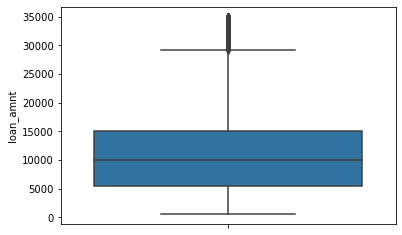

In [123]:
sns.boxplot(data=filtered_df, y=filtered_df.loan_amnt)

In [126]:
filtered_df.loan_amnt.skew()

1.0593172896133878

<AxesSubplot:ylabel='funded_amnt'>

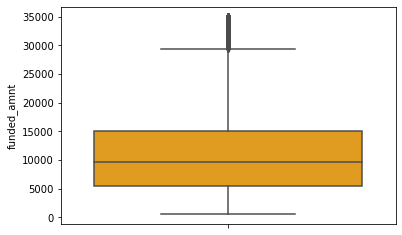

In [124]:
sns.boxplot(data=filtered_df, y=filtered_df.funded_amnt, color='orange')

In [127]:
filtered_df.funded_amnt.skew()

1.0817102383375885

<AxesSubplot:ylabel='funded_amnt_inv'>

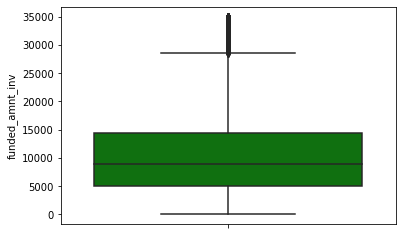

In [128]:
sns.boxplot(data=filtered_df, y=filtered_df.funded_amnt_inv, color='green')

In [130]:
filtered_df.funded_amnt_inv.skew()

1.1062129383204573

<AxesSubplot:ylabel='int_rate'>

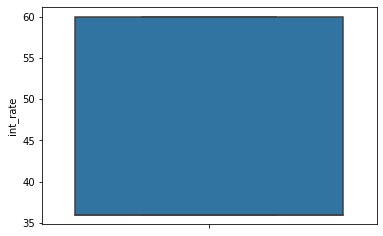

In [131]:
sns.boxplot(y=filtered_df.int_rate)